# Waiting time Paradox #

When the arriving interval is fix value, t1 is equal to average arrival time $\tau$.<br />
When the arriving interval is a exponential distribution with the same average arrival time expectation $\tau$.<br />
Whicn is called [waiting time paradox](https://stats.stackexchange.com/questions/122722/please-explain-the-waiting-paradox).<br />
The reason of that is  [the Memoryless Property](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/ExponentialForgetfulness.pdf) of the Poisson Process.
$$P(x>y+t|x>y) = \frac{P(x>y+t|x>y)}{P(x>y)} = P(x>t)$$


bl: 8.91972
al, 9.37457
tl: 18.29429000000003
tau 10.177569999999992


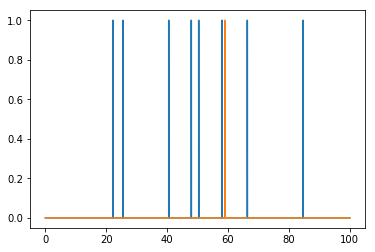

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

end_time = 100
sample_rate = 0.005
x = np.arange(0, end_time, sample_rate);
y = np.zeros(np.shape(x))
arr_time = 0

insert_ind = int(random.random() * end_time // sample_rate)
c = np.zeros(np.shape(x))
c[insert_ind] = 1

arr_list = [0]
count = 0
while 1:
    arr_time = arr_time + np.random.exponential(10)
    arr_ind = int(arr_time//sample_rate)
    arr_list.append(arr_ind)
    if arr_time < end_time:
        y[arr_ind] = 1
        if arr_list[count] < insert_ind and arr_list[count+1] > insert_ind:
            b = (insert_ind - arr_list[count]) * sample_rate
            a =  (arr_list[count+1] - insert_ind) * sample_rate
        count+=1
    else:
        break

plt.plot(x,y)
plt.plot(x,c)

#bl is a list contain the time interval between observer and last event happens
#al is a list contain the time interval between observer and next event happens
#tl is the sum of al and bl
#ave is the interval of two event happen
bl = []
al = []
tl = []
ave = []

for i in range(1000):
    x = np.arange(0, end_time, sample_rate);
    y = np.zeros(np.shape(x))
    arr_time = 0
    
    insert_ind = int(random.random() * end_time // sample_rate)
    c = np.zeros(np.shape(x))
    c[insert_ind] = 1
    
    arr_list = [0]
    count = 0
    while 1:
        arr_time = arr_time + np.random.exponential(10) #if change the arriving interval to fix value, t1 become tau.
        arr_ind = int(arr_time//sample_rate)
        arr_list.append(arr_ind)
        if arr_time < end_time:
            y[arr_ind] = 1
            if arr_list[count] < insert_ind and arr_list[count+1] > insert_ind:
                b = (insert_ind - arr_list[count]) * sample_rate
                a = (arr_list[count+1] - insert_ind) * sample_rate
                t = (arr_list[count+1] - arr_list[count]) *sample_rate  
            count+=1
        else:
            break

    bl.append(b)
    al.append(a)
    tl.append(t)
    ave.append(arr_list[1]*sample_rate)

#print(bl)
print('bl:',sum(bl)/len(bl))
#print(al)
print('al,',sum(al)/len(al))

print('tl:',sum(tl)/len(tl))

print('tau',sum(ave)/len(ave))